In [12]:
# Importing pandas library
import pandas as pd

# Reading the CSV file
data = pd.read_csv('../data/credit_card_data.csv')

# Displaying the first few rows of the dataset
print("Displaying the first few rows of the dataset:")
print(data.head())

# Displaying information about the dataset
print("Displaying information about the dataset:")
print(data.info())

# count missing values
print("Count total NaN at each column in a DataFrame :")
print(data.isnull().sum())

Displaying the first few rows of the dataset:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.

In [13]:
# Reading the CSV file
data = pd.read_csv('../data/credit_card_data.csv')

# Displaying descriptive statistics of the dataset
summary = data.describe()
print(summary)

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

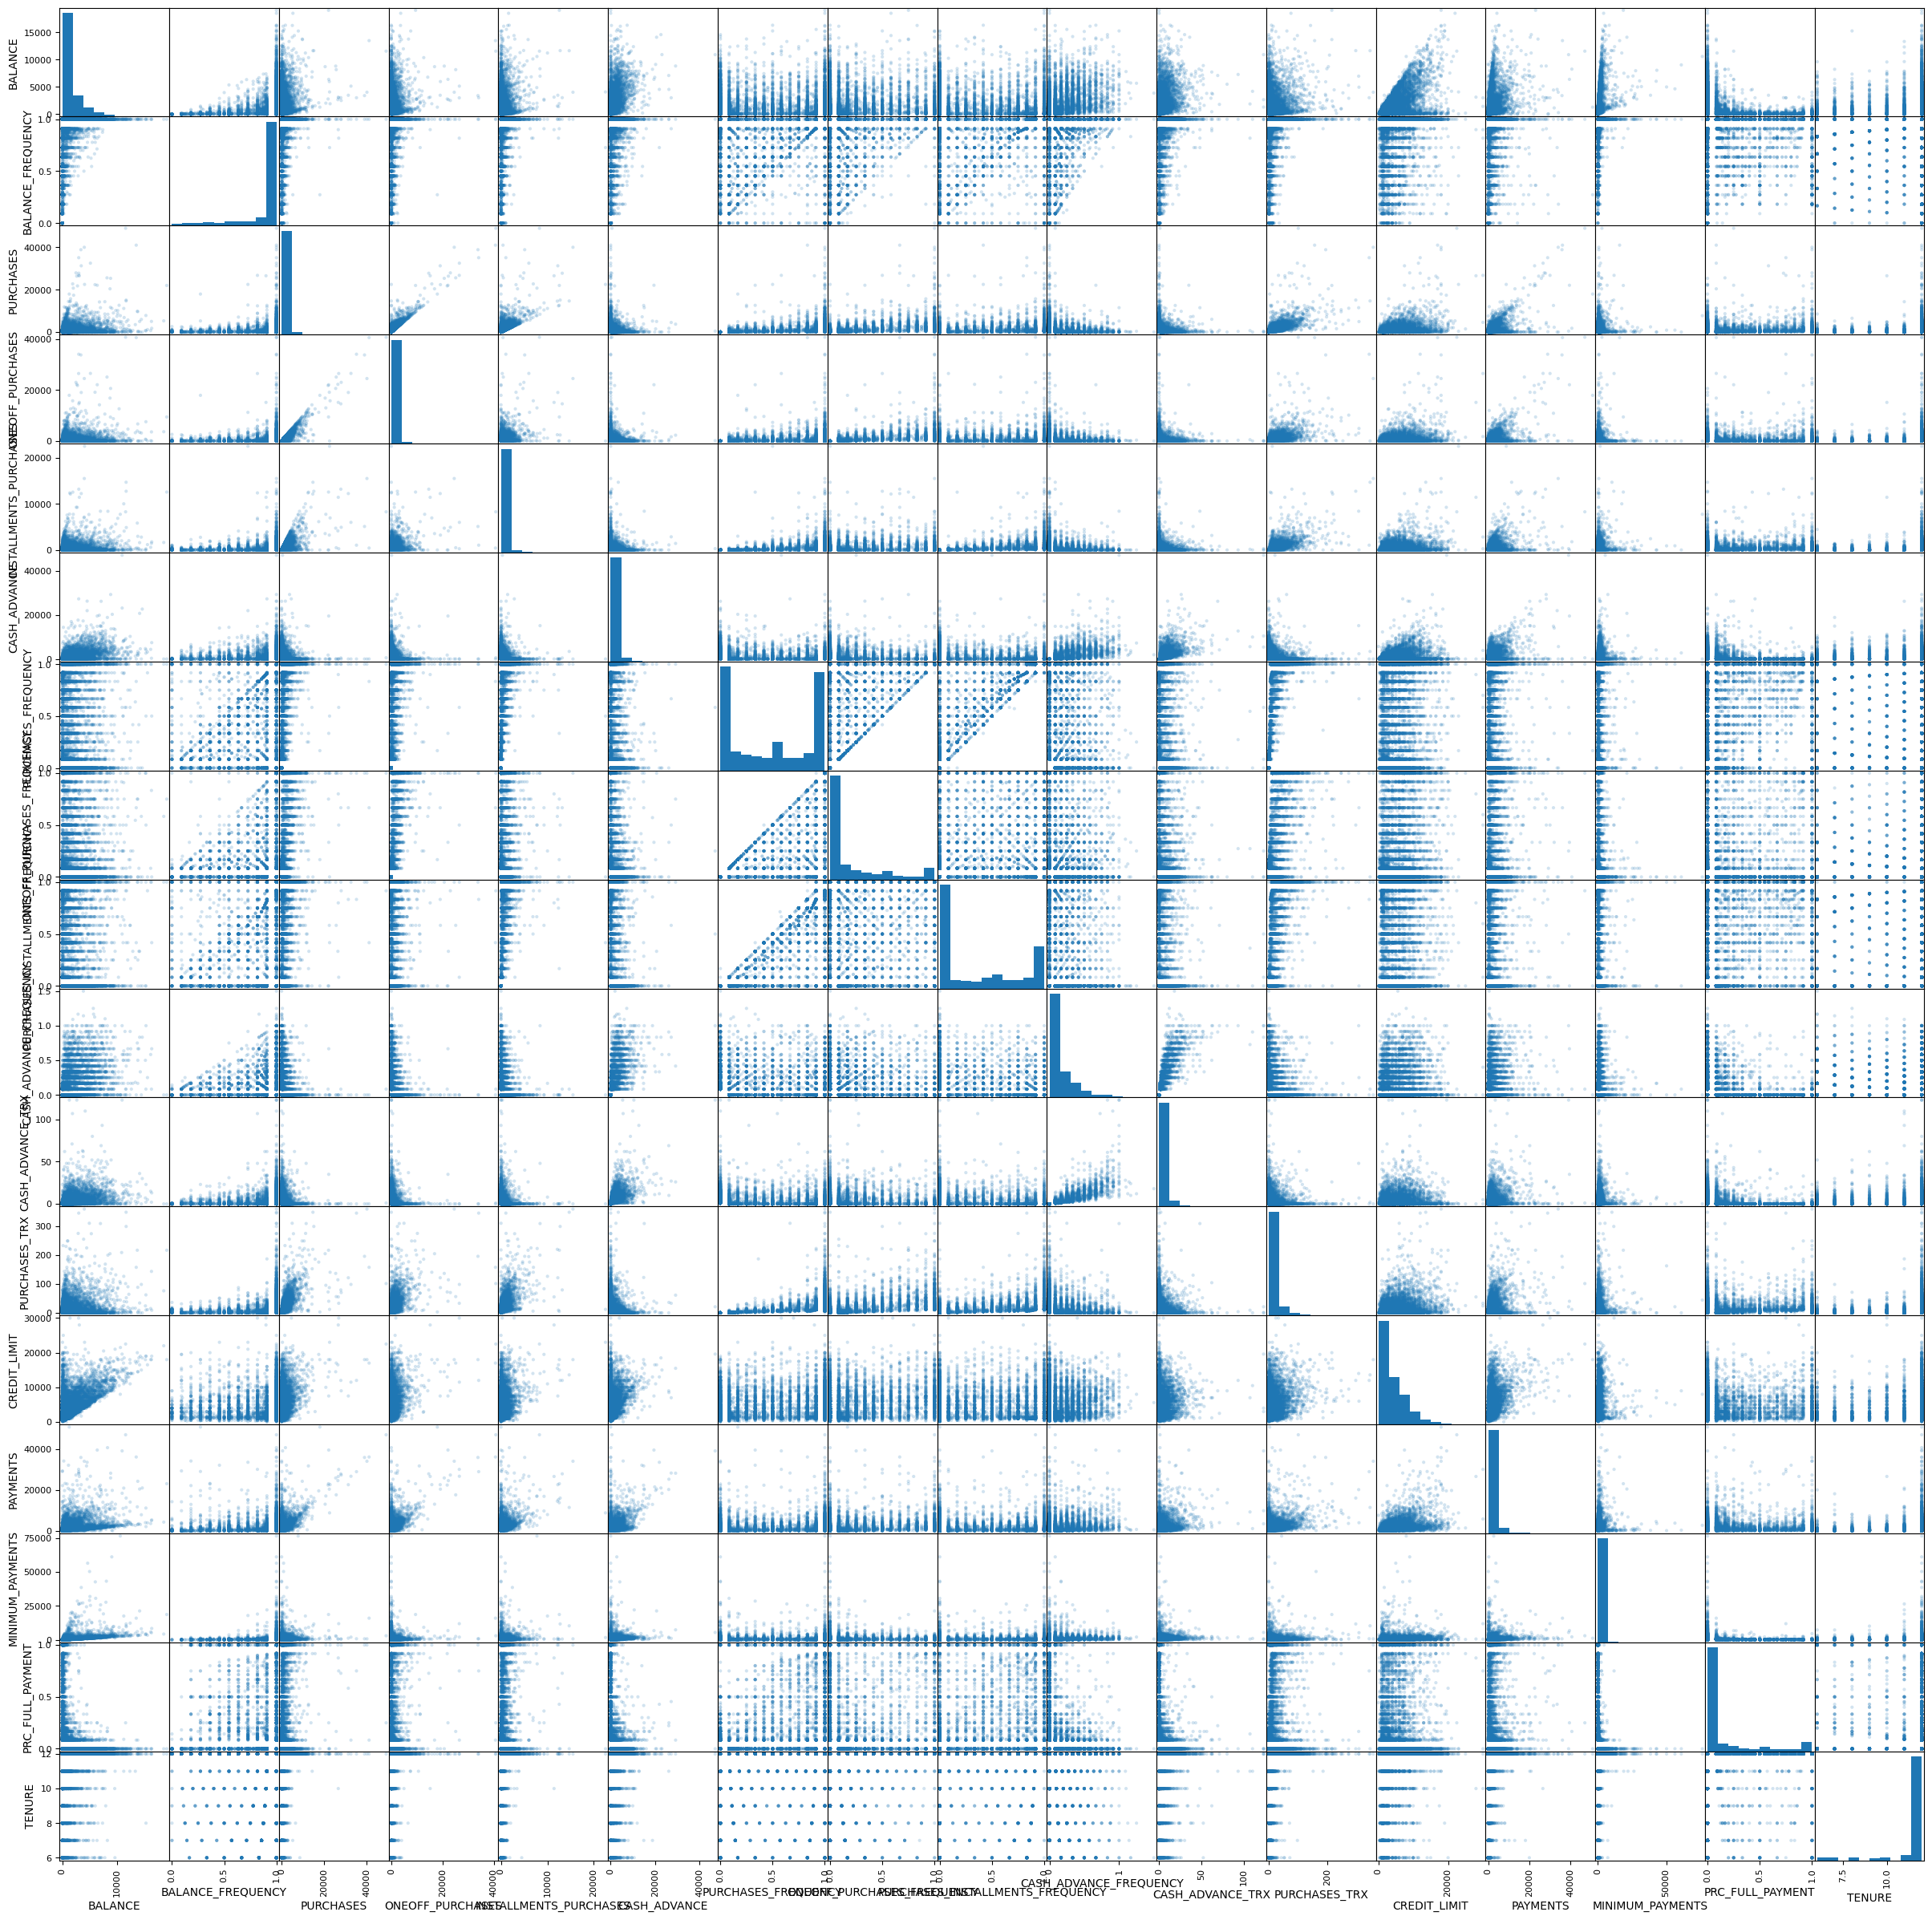

In [14]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Creating a scatter matrix
scatter_matrix(data, alpha=0.2, figsize=(30, 30))

# Displaying the plot
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Dropping the CUST_ID column
data = data.drop(['CUST_ID'], axis=1)

# fill missing values with mean column values
data.fillna(data.mean(), inplace=True)

# Fit the scaler to the data
scaler.fit(data)

# Transform the data
data_standardized = scaler.transform(data)

# Convert the standardized data back to a DataFrame
data_standardized = pd.DataFrame(data_standardized)

In [16]:
print(data_standardized.head())
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# the number of components
n_components = 2

# Create a PCA instance
pca = PCA(n_components=n_components)

# Fit and transform the data to the PCA
data_pca = pca.fit_transform(data_standardized)

# Convert the PCA data back to a DataFrame
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

# Create a t-SNE instance
tsne = TSNE(n_components=n_components)

# Fit and transform the data to the t-SNE
data_tsne = tsne.fit_transform(data_standardized)

# Convert the t-SNE data back to a DataFrame
data_tsne = pd.DataFrame(data_tsne, columns=['TSNE1', 'TSNE2'])

         0         1         2         3         4         5         6   \
0 -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1  0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2  0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3  0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4 -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   

         7         8         9         10        11        12        13  \
0 -0.678661 -0.707313 -0.675349 -0.476070 -0.511333 -0.960433 -0.528979   
1 -0.678661 -0.916995  0.573963  0.110074 -0.591796  0.688639  0.818642   
2  2.673451 -0.916995 -0.675349 -0.476070 -0.109020  0.826062 -0.383805   
3 -0.399319 -0.916995 -0.258913 -0.329534 -0.551565  0.826062 -0.598688   
4 -0.399319 -0.916995 -0.675349 -0.476070 -0.551565 -0.905464 -0.364368   

             14        15       16  
0 -3.109675e-01 -0.525551  0.36068  
1  8.931021e-02  0.23422

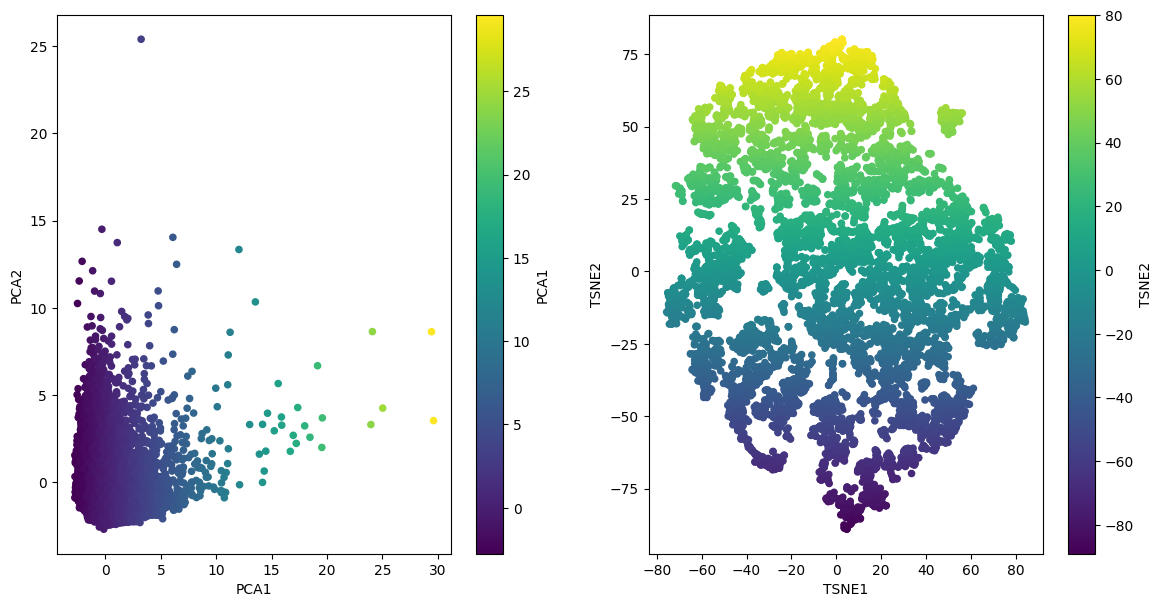

In [17]:
from sklearn.cluster import KMeans

# the number of clusters
n_clusters = 3

# Create a KMeans instance
kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10)

# Fit the model to the PCA data
kmeans_pca.fit(data_pca)

# Predict the clusters
clusters_pca = kmeans_pca.predict(data_pca)

# Add the clusters to the PCA DataFrame
data_pca['Cluster'] = clusters_pca

# Create a KMeans instance
kmeans_tsne = KMeans(n_clusters=n_clusters, n_init=10)

# Fit the model to the t-SNE data
kmeans_tsne.fit(data_tsne)

# Predict the clusters
clusters_tsne = kmeans_tsne.predict(data_tsne)

# Draw the first plot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
data_pca.plot.scatter(x='PCA1', y='PCA2', c=0, colormap='viridis', ax=ax[0])
# Draw the second plot
data_tsne.plot.scatter(x='TSNE1', y='TSNE2', c=1, colormap='viridis', ax=ax[1])
plt.show()

Interpretation of results from the PCA-based model: 
- the clusters in the PCA space are well separated, it means that PCA has successfully found the directions of maximum variance in the data and these directions are useful for separating different clusters. If the clusters overlap, it could mean that the directions of maximum variance do not necessarily correspond to the directions that best separate the clusters.  
--------------------------------------------------------------------------------------------------------------------------------------
Interpretation of results from the t-SNE-based model: 
- the clusters in the t-SNE space are well separated, it means that t-SNE has successfully preserved the neighborhood relationships between data points in the reduced-dimension space. If the clusters overlap, it could mean that the complex neighborhood structure of the data has not been fully preserved.
----------------------------------------------------------------------------------------------------------------------------------------
-> the problem could maybe be solved by changing the number of clusters k, or improving the n_components parameter of the PCA and t-SNE models.

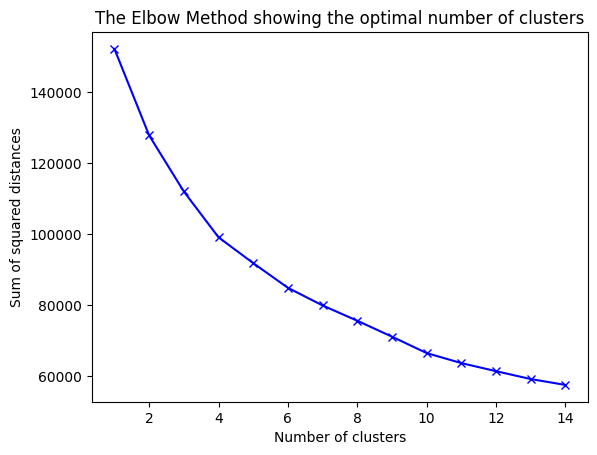

In [18]:
# Finding the optimal number of clusters k (Elbow method)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Initialize an empty list to store the sum of squared distances (SSD)
ssd = []

# Step 2: Define a range for the number of clusters you want to test
range_n_clusters = range(1, 15)

# Step 3: For each number of clusters, create a KMeans instance, fit the model to the data, and compute the SSD
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(data_standardized)
    ssd.append(kmeans.inertia_)

# Step 4: Plot the SSD against the number of clusters
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()


In [19]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict the clusters
clusters_dbscan = dbscan.fit_predict(data_standardized)

In [20]:
from sklearn.mixture import GaussianMixture

# Create a GaussianMixture instance
gmm = GaussianMixture(n_components=6)

# Fit the model to the data
gmm.fit(data_standardized)

# Predict the clusters
clusters_gmm = gmm.predict(data_standardized)

In [21]:
from minisom import MiniSom

# Create a MiniSom instance
som = MiniSom(x=10, y=10, input_len=data_standardized.shape[1])

# Train the SOM
som.train_random(data_standardized.values, 100)

# Each neuron represents a cluster

ModuleNotFoundError: No module named 'minisom'

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create an Agglomerative Clustering instance
agglo = AgglomerativeClustering(n_clusters=3)

# Fit and predict the clusters
clusters_agglo = agglo.fit_predict(data_standardized)

In [ ]:
from sklearn import metrics

# List of algorithms
algorithms = [dbscan, gmm, som, agglo, kmeans_pca, kmeans_tsne]
algorithm_names = ['DBSCAN', 'EM', 'SOM', 'Hierarchical Clustering', 'KMeans PCA', 'KMeans t-SNE']

# Initialize lists to store the metrics
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate the metrics for each algorithm
for algorithm in algorithms:
    labels = algorithm.predict(data_standardized)
    silhouette_scores.append(metrics.silhouette_score(data_standardized, labels))
    davies_bouldin_scores.append(metrics.davies_bouldin_score(data_standardized, labels))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(data_standardized, labels))

# Print the metrics
for i in range(len(algorithm_names)):
    print(f"{algorithm_names[i]}:")
    print(f"Silhouette Score: {silhouette_scores[i]}")
    print(f"Davies-Bouldin Score: {davies_bouldin_scores[i]}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_scores[i]}")